In [1]:
import numpy as np

start = np.array([-1.0, -3.0, 0.0])
goal = np.array([-0.5, 2.0, 1.0])

gates = [
    [0.5, -2.5, 0, 0, 0, -1.57, 0],
    [2.0, -1.5, 0, 0, 0, 0, 0],
    [0.0, 0.5, 0, 0, 0, 1.57, 0],
    [-0.5, 1.5, 0, 0, 0, 0, 0]
]

obstacles = [
    [1.5, -2.5, 0, 0, 0, 0],
    [0.5, -1.0, 0, 0, 0, 0],
    [1.5,    0, 0, 0, 0, 0],
    [-1.0,   0, 0, 0, 0, 0]
]
gates = np.array(gates)
obstacles = np.array(obstacles)

In [2]:
from matplotlib import pyplot as plt
from matplotlib import patches

# Create a plot

def plot_environment(gates, obstacles, path=None):
    """Visualize the environment with gates and obstacles."""
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Plot obstacles as filled circles  
    obstacle_diameter = 0.30 # 12 cm = 0.12 m  
    obstacle_radius = obstacle_diameter / 2  
    
    for obs in obstacles:  
        obs_x, obs_y = obs[0], obs[1]  
        circle = patches.Circle(  
            (obs_x, obs_y),  
            obstacle_radius,  
            linewidth=1,  
            edgecolor='magenta',  
            facecolor='magenta'  # Solid fill color  
        )  
        ax.add_patch(circle)  # Plot obstacles as circles  
    
    # Plot gates as filled rectangles  
    gate_width = 0.6  # 40 cm = 0.4 m  
    gate_height = 0.1  # Assuming a height to visualize the gate in 2D  
    
    for idx, gate in enumerate(gates):
        gate_x, gate_y, _, _, _, yaw, _ = gate  
        
        # Create rotation matrix for the gate  
        angle_rad = yaw  
        rotation_matrix = np.array([  
            [np.cos(angle_rad), -np.sin(angle_rad)],  
            [np.sin(angle_rad),  np.cos(angle_rad)]  
        ])  
        
        # Calculate the adjusted center for the gate  
        displacement = np.dot(rotation_matrix, np.array([gate_width / 2, gate_height / 2]))  
        rect_center_x, rect_center_y = gate_x - displacement[0], gate_y - displacement[1]  
        
        rect = patches.Rectangle(  
            (rect_center_x, rect_center_y),  
            gate_width, gate_height,  
            angle=np.degrees(yaw),  
            linewidth=5,  
            edgecolor='b',  
            facecolor='b'  # Solid fill color  
        )  
        ax.add_patch(rect)
        
        # label the gate with its ID
        ax.text(gate_x, gate_y + 0.0, str(idx), fontsize=11, ha='center', va='center', color='white')
        

    # add start and finish points, use stars

    ax.plot(start[0], start[1], 'g*', label='start', markersize=10)
    ax.plot(goal[0], goal[1], 'r*', label='Finish', markersize=10)
    ax.legend(loc='upper right')
    
    # Plot path if provided, with arrows 
    if path is not None:
        path = np.array(path)
        ax.plot(path[:, 0], path[:, 1], 'k-', label='Path', linewidth=2)
        """
        for i in range(len(path) - 1):
            ax.annotate('', xy=path[i + 1], xytext=path[i],
                        arrowprops=dict(arrowstyle='->', color='black', lw=2),
                        fontsize=12, ha='center', va='center')
        """
    
    # Set plot limits  
    ax.set_xlim(-3.5, 3.5)  
    ax.set_ylim(-3.5, 3.5)  
    
    # Set aspect ratio  
    ax.set_aspect('equal', 'box')  
    
    # Labels and title  
    ax.set_xlabel('X Position (m)')  
    ax.set_ylabel('Y Position (m)')  
    ax.set_title('Environment with Gates and Obstacles')

    # Show plot  
    plt.grid(True)  
    
    return fig

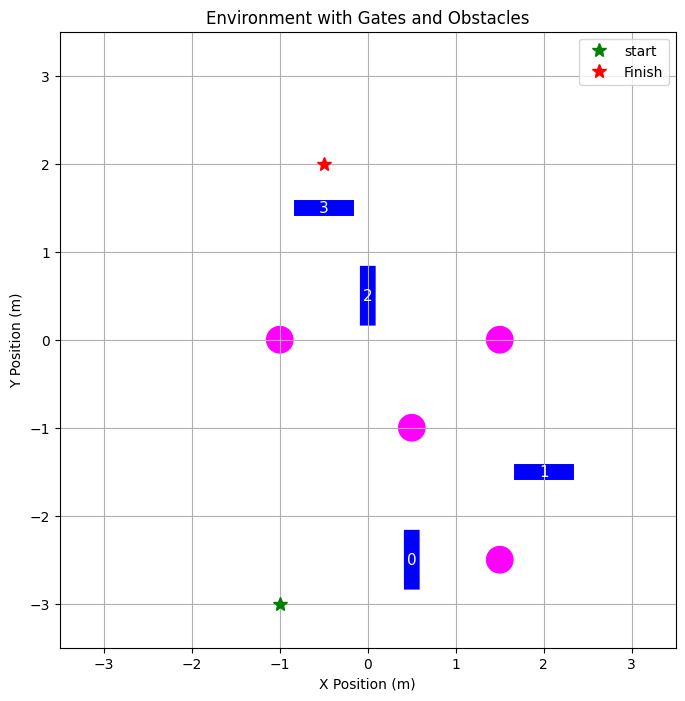

In [3]:
fig = plot_environment(gates, obstacles)

In [4]:
import example_custom_utils as ecu

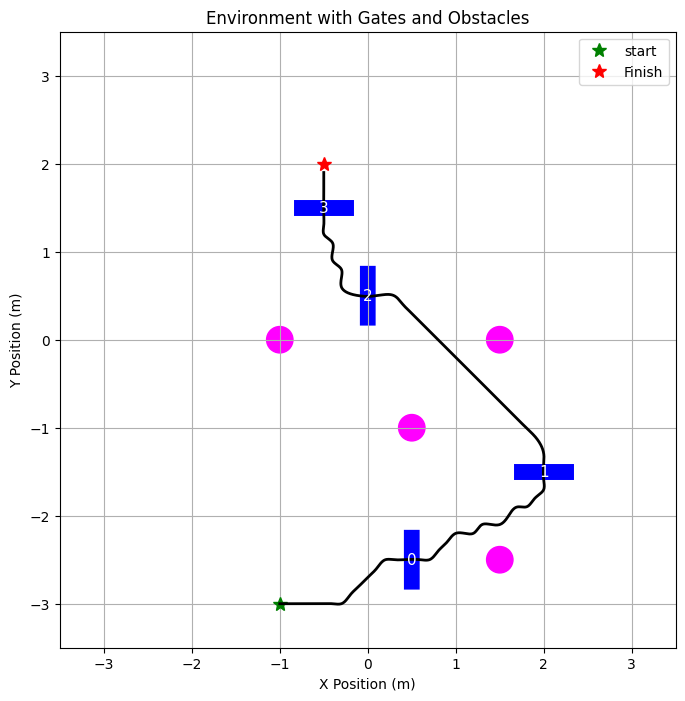

In [5]:
path = ecu.get_path(start, goal, obstacles, gates, time=40, CTRL_FREQ=30)

fig = plot_environment(gates, obstacles, path=path)
# save fig
fig.savefig('1234.png', dpi=300, bbox_inches='tight')


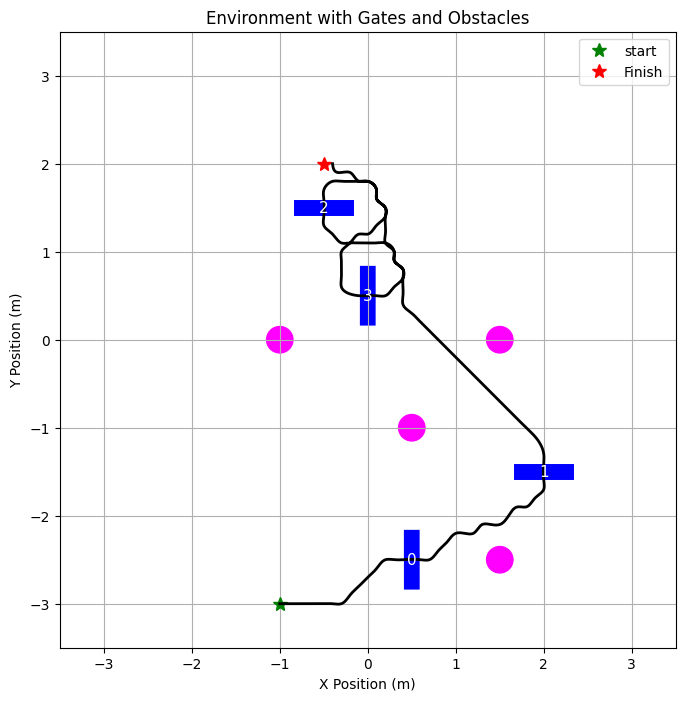

In [6]:
# gates order is 0, 1, 2, 3, change it to , 0, 1, 2, 3, 2, 1

gates = np.array([
    [0.5, -2.5, 0, 0, 0, -1.57, 0],  # 1
    [2.0, -1.5, 0, 0, 0, 0, 0],  # 2
    [-0.5, 1.5, 0, 0, 0, 0, 0],  # 4
    [0.0, 0.5, 0, 0, 0, 1.57, 0]  # 3
])
path = ecu.get_path(start, goal, obstacles, gates, time=40, CTRL_FREQ=30)

fig = plot_environment(gates, obstacles, path=path)
fig.savefig('1243.png', dpi=300, bbox_inches='tight')

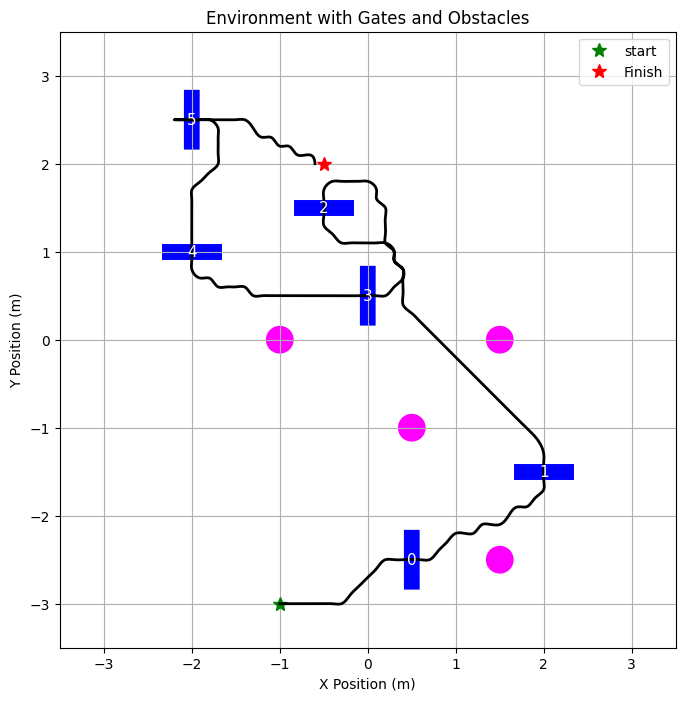

In [7]:
# gates order is 0, 1, 2, 3, change it to , 0, 1, 2, 3, 2, 1

gates = np.array([
    [0.5, -2.5, 0, 0, 0, -1.57, 0],  # 1
    [2.0, -1.5, 0, 0, 0, 0, 0],  # 2
    [-0.5, 1.5, 0, 0, 0, 0, 0],  # 4
    [0.0, 0.5, 0, 0, 0, 1.57, 0],  # 3
    [-2.0, 1.0, 0, 0, 0, 0, 0],  # 4
    [-2.0, 2.5, 0, 0, 0, 1.57, 0],  # 5
])
path = ecu.get_path(start, goal, obstacles, gates, time=45, CTRL_FREQ=30)

fig = plot_environment(gates, obstacles, path=path)
fig.savefig('12435.png', dpi=300, bbox_inches='tight')


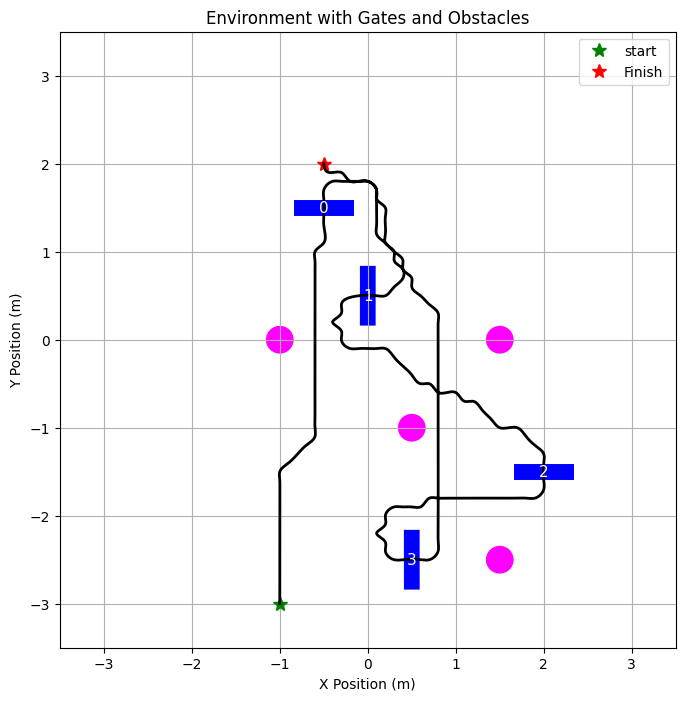

In [8]:
gates = np.array([
    [-0.5, 1.5, 0, 0, 0, 0, 0],  # 4
    [0.0, 0.5, 0, 0, 0, 1.57, 0],  # 3
    [2.0, -1.5, 0, 0, 0, 0, 0],  # 2
    [0.5, -2.5, 0, 0, 0, -1.57, 0]  # 1
])
path = ecu.get_path(start, goal, obstacles, gates, time=40, CTRL_FREQ=30)

fig = plot_environment(gates, obstacles, path=path)
fig.savefig('4321.png', dpi=300, bbox_inches='tight')

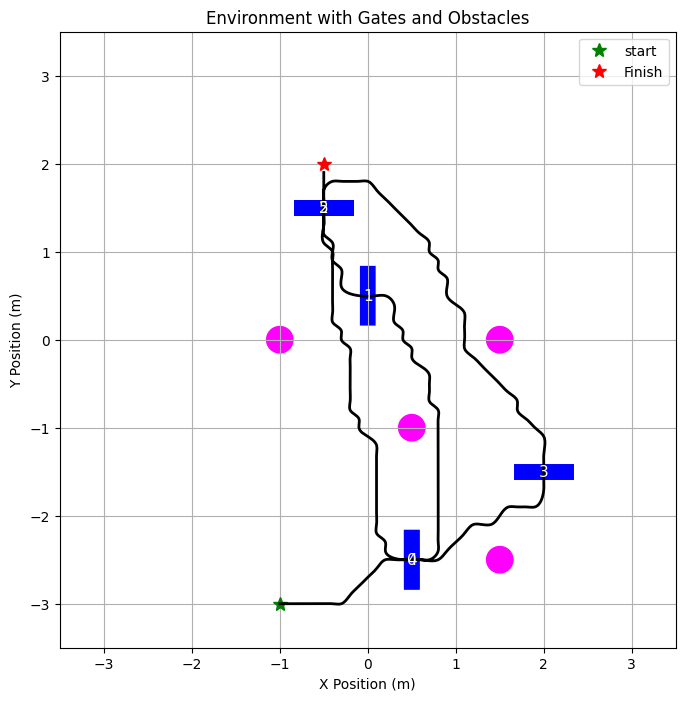

In [9]:
gates = np.array([
    [0.5, -2.5, 0, 0, 0, -1.57, 0],     # 1
    [0.0, 0.5, 0, 0, 0, 1.57, 0],       # 3
    [-0.5, 1.5, 0, 0, 0, 0, 0],         # 4
    [2.0, -1.5, 0, 0, 0, 0, 0],         # 2
    [0.5, -2.5, 0, 0, 0, -1.57, 0],      # 1
    [-0.5, 1.5, 0, 0, 0, 0, 0],         # 4

])
path = ecu.get_path(start, goal, obstacles, gates, time=45, CTRL_FREQ=30)

fig = plot_environment(gates, obstacles, path=path)
fig.savefig('134214.png', dpi=300, bbox_inches='tight')